# Prosper Loan Data Analysis

## Introduction

In this notebook, I will try to investigate this dataset, get insights from them, then visualization the results. I choose Prosper Loan Dataset because I was a banker before and I have some experience in the Loan process.

Original dataset can be downloadable from the internet: https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv.

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. However, we are not expected to explore all of the variables in the dataset! We will focus our exploration on about 10-15 of them.

For those who are not familiar with financial indexes, this attached link can be useful to refer to any terms you don't know: https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit?usp=sharing

The scope of this analysis is to find some common features of Prosper Loan Clients as well as some factors that may affect their loan status.

## Wrangling the data
We will start with cleaning the dataset, dropping some unneccessary and irrelevant data, filling some missing data with our caculated algorithm, then finally analyzing and visualizing it.

In [200]:
#Imports some needed library, setting default style
import math
import datetime
import numpy as np
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
sns.set_context({"figure.figsize": (15, 7.5)})

In [201]:
#REad data from csv file 
df = pd.read_csv("prosperLoanData.csv")

In [202]:
#Taking a look at the head of the data frame
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [203]:
#Taking a look at the whole data frame, columns name, identifying missing value and data type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

This data frame, in general, is having some issues that need to be solved.

- At first, there are many variables that are not important or we don't need due to the limit of our analysis. Getting rid of them will make the dataset easier to read and understand.

- Secondly, there are too many cells that have Null value, abnormal value and improper types noticed in some columns. Some of them can be calculated/inputted with algorithm. The more comprehensive the dataframe has, the more easier the analysis task is.

###  Firstly, dropping redundant, unnecessary columns is the initial step to make the data set more clean. It makes we only focusing on the leftover important variables.

In [204]:
# Those columns are unnecessary as we make no use of them
df.drop(["ListingKey", "ListingNumber", "LoanKey", "LoanNumber", 
         "MemberKey"], axis=1, inplace=True)

In [205]:
# I don't think we have anything to deal with date data as they have pretty much no effect to the outcome of the loan
df.drop(["ListingCreationDate", "ClosedDate", "DateCreditPulled", 
         "LoanOriginationDate", "LoanMonthsSinceOrigination", 
         "LoanOriginationQuarter"], axis=1, inplace=True)

In [206]:
#Loan history similiarly has very few impact on the loan's status of clients
df.drop(["LoanCurrentDaysDelinquent", "LoanFirstDefaultedCycleNumber", 
         "LP_CustomerPayments", "LP_CustomerPrincipalPayments", "LP_InterestandFees", 
         "LP_ServiceFees", "LP_CollectionFees", "LP_GrossPrincipalLoss",
         "LP_NetPrincipalLoss", "LP_NonPrincipalRecoverypayments"], axis=1, inplace=True)

In [207]:
# Similarity, there are some of the credit atributes are not really the important value for further analysis
df.drop(["CreditGrade", "EmploymentStatusDuration", "FirstRecordedCreditLine", "CurrentCreditLines", 
         "TotalCreditLinespast7years", "ScorexChangeAtTimeOfListing", "ProsperRating (Alpha)", 
         "Occupation", "CurrentlyInGroup", "GroupKey", "IncomeRange", "PercentFunded"], axis = 1, inplace = True)

In [208]:
# Investment information and recommendations are unnessccessary too
df.drop(["Recommendations", "InvestmentFromFriendsCount", "InvestmentFromFriendsAmount", "Investors"], axis = 1, inplace = True)

In [209]:
# Take a look at the data set now
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 44 columns):
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperScore                           84853 non-null float64
ListingCategory (numeric)              113937 non-null int64
BorrowerState                          108422 non-null object
EmploymentStatus                       111682 non-null object
IsBorrowerHomeowner                    113937 non-null bool
CreditScoreRangeLower 

### Secondly, we continue with filling missing value for the data set, setting their value right for the analizing process

APR is an important value, however, there are 113912 BorrowerAPR value instead of 113937 in the dataset. An easy fix is to caculate the missing APR as we know that BorrowerAPR = BorrowerRate + fee. So we can caculate the median fee, then add them to the missing cells.

In [210]:
borrower_fees = df["BorrowerAPR"] - df["BorrowerRate"]
borrower_fees.median()

0.025019999999999987

In [211]:
df["BorrowerAPR"].fillna(df["BorrowerRate"] + borrower_fees.median(), inplace=True)
# Recheck to make sure the cells are filled
df["BorrowerAPR"].isnull().sum()

0

EstimatedEffectiveYield, EstimatedLoss, EstimatedReturn are the next in line as they have only 84853 value compare to 113937 value of the whole dataset 

In [212]:
#Effective yield is equal to the borrower interest rate (i) minus the servicing fee rate, (ii) minus estimated uncollected interest on charge-offs, (iii) plus estimated collected late fees
estimated_loss_from_fees = df["BorrowerRate"] - df["EstimatedEffectiveYield"]
estimated_loss_from_fees.median()

0.01915

In [213]:
df["EstimatedEffectiveYield"].fillna(df["BorrowerRate"] - estimated_loss_from_fees.median(), inplace=True)
df["EstimatedEffectiveYield"].isnull().sum()

0

In [214]:
# Estimated loss is the estimated principal loss on charge-offs. We can fill the EstimatedLoss missing cells with their median
df["EstimatedLoss"].isnull().sum()

29084

In [215]:
df["EstimatedLoss"].fillna(df["EstimatedLoss"].median(), inplace=True)
df["EstimatedLoss"].isnull().sum()

0

In [216]:
#Estimated return is the difference between the Estimated Effective Yield and the Estimated Loss Rate.
df["EstimatedReturn"].fillna(df["EstimatedEffectiveYield"] - df["EstimatedLoss"], inplace=True)
df["EstimatedReturn"].isnull().sum()

0

In [217]:
#The numeric ProsperRating and the ProsperScore NaNs can both be replaced with median values.
df["ProsperRating (numeric)"].fillna(df["ProsperRating (numeric)"].median(), inplace=True)
df["ProsperScore"].fillna(df["ProsperScore"].median(), inplace=True)

In [218]:
#To fix Missing debt to income ratio
#We want to see how many debt to income ratio cell are missing 
df_debt_income_null = df[df["DebtToIncomeRatio"].isnull()]
df_debt_income_null.count()

Term                                   8554
LoanStatus                             8554
BorrowerAPR                            8554
BorrowerRate                           8554
LenderYield                            8554
EstimatedEffectiveYield                8554
EstimatedLoss                          8554
EstimatedReturn                        8554
ProsperRating (numeric)                8554
ProsperScore                           8554
ListingCategory (numeric)              8554
BorrowerState                          8482
EmploymentStatus                       8525
IsBorrowerHomeowner                    8554
CreditScoreRangeLower                  8548
CreditScoreRangeUpper                  8548
OpenCreditLines                        8430
OpenRevolvingAccounts                  8554
OpenRevolvingMonthlyPayment            8554
InquiriesLast6Months                   8442
TotalInquiries                         8539
CurrentDelinquencies                   8442
AmountDelinquent                

We stated that 8554 rows have missing debt to income ratio. However, fortunately, the index can be easily caculate using MonthlyLoanPayment and StatedMonthlyIncome

In [219]:
df["DebtToIncomeRatio"].fillna(df["MonthlyLoanPayment"] / df["StatedMonthlyIncome"], inplace = True)
df["DebtToIncomeRatio"].isnull().sum()

15

In [220]:
#Still have 15 cells can't be filled? I think the problem may be related to the denominator. let's check
df_debt_income_still_null = df[df["DebtToIncomeRatio"].isnull()]
df_debt_income_still_null["StatedMonthlyIncome"]

5169      0.0
14054     0.0
19922     0.0
24284     0.0
26810     0.0
39343     0.0
55429     0.0
57630     0.0
60207     0.0
61498     0.0
80964     0.0
90499     0.0
93386     0.0
95696     0.0
104466    0.0
Name: StatedMonthlyIncome, dtype: float64

In [221]:
# My solution is to fill those value with unknown
df_debt_income_still_null= df_debt_income_still_null['DebtToIncomeRatio'].replace("Unknown")
df_debt_income_still_null

5169     NaN
14054    NaN
19922    NaN
24284    NaN
26810    NaN
39343    NaN
55429    NaN
57630    NaN
60207    NaN
61498    NaN
80964    NaN
90499    NaN
93386    NaN
95696    NaN
104466   NaN
Name: DebtToIncomeRatio, dtype: float64

Now we take a look at Credit score. Since we have two columns named CreditScoreRangeLower and CreditScoreRangeUpper, simplifying them by taking the medium then create a new column named CreditScore. It would be much easier for us to analyze that index

In [222]:
df["CreditScoreRangeUpper"]=(df["CreditScoreRangeUpper"] + df["CreditScoreRangeLower"])/2
df.rename(index = str, columns={"CreditScoreRangeUpper": "CreditScore"}, inplace=True)
df.drop(columns = "CreditScoreRangeLower", inplace = True)

In [223]:
df["CreditScore"]

0         649.5
1         689.5
2         489.5
3         809.5
4         689.5
5         749.5
6         689.5
7         709.5
8         829.5
9         829.5
10        649.5
11        649.5
12        689.5
13        749.5
14        749.5
15        709.5
16        649.5
17        769.5
18        749.5
19        689.5
20        669.5
21        629.5
22        709.5
23        689.5
24        669.5
25        689.5
26        669.5
27        709.5
28        729.5
29        749.5
          ...  
113907    649.5
113908    709.5
113909    809.5
113910    649.5
113911    669.5
113912    809.5
113913    789.5
113914    529.5
113915    629.5
113916    669.5
113917    669.5
113918    749.5
113919    689.5
113920    749.5
113921      NaN
113922    649.5
113923    709.5
113924    649.5
113925    689.5
113926    549.5
113927    769.5
113928    749.5
113929    669.5
113930    689.5
113931    809.5
113932    709.5
113933    709.5
113934    709.5
113935    689.5
113936    689.5
Name: CreditScore, Lengt

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113937 entries, 0 to 113936
Data columns (total 43 columns):
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
BorrowerAPR                            113937 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                113937 non-null float64
EstimatedLoss                          113937 non-null float64
EstimatedReturn                        113937 non-null float64
ProsperRating (numeric)                113937 non-null float64
ProsperScore                           113937 non-null float64
ListingCategory (numeric)              113937 non-null int64
BorrowerState                          108422 non-null object
EmploymentStatus                       111682 non-null object
IsBorrowerHomeowner                    113937 non-null bool
CreditScore           

Scrolling down to the bottom, one can not deny that we are missing too many value in TotalProsperLoans and some columns next to it 

In [225]:
# Filling those value with 0 may solve the problem
to_fill_column= ["TotalProsperLoans","TotalProsperPaymentsBilled", "OnTimeProsperPayments", 
                "ProsperPaymentsLessThanOneMonthLate", "ProsperPaymentsOneMonthPlusLate", 
                "ProsperPrincipalBorrowed", "ProsperPrincipalOutstanding"]
df[to_fill_column] = df[to_fill_column].fillna(0)
df.isnull().sum()

Term                                      0
LoanStatus                                0
BorrowerAPR                               0
BorrowerRate                              0
LenderYield                               0
EstimatedEffectiveYield                   0
EstimatedLoss                             0
EstimatedReturn                           0
ProsperRating (numeric)                   0
ProsperScore                              0
ListingCategory (numeric)                 0
BorrowerState                          5515
EmploymentStatus                       2255
IsBorrowerHomeowner                       0
CreditScore                             591
OpenCreditLines                        7604
OpenRevolvingAccounts                     0
OpenRevolvingMonthlyPayment               0
InquiriesLast6Months                    697
TotalInquiries                         1159
CurrentDelinquencies                    697
AmountDelinquent                       7622
DelinquenciesLast7Years         

In [226]:
# replacing those remaining Null value with "Unknown"
object_type_col = df.select_dtypes(include=["object"]).columns.values
df[object_type_col] = df[object_type_col].fillna("Unknown")
df.select_dtypes(exclude=[np.number]).isnull().sum()

LoanStatus             0
BorrowerState          0
EmploymentStatus       0
IsBorrowerHomeowner    0
IncomeVerifiable       0
dtype: int64

## Visualizing the data

### Loan Purpose by Category
Loan purpose is an important index as it can easily tell us the validity of clients' request when they start applying to the loan. When a loan purpose doesn't fit the bank policy, client can be rejected form the beginning process.

In [227]:
# To get insight from this index, we have to convert ListingCategory columns into an easy read data in stead of just numbers.
df.replace(to_replace={"ListingCategory (numeric)": {0: "Unknown", 1: "Debt", 2: "Reno", 3: "Business", 4: "Personal",
                                                                5: "Student", 6: "Auto", 7: "Other", 8: "Baby", 9: "Boat", 
                                                                10: "Cosmetic", 11: "Engagement", 12: "Green", 13: "Household",
                                                                14: "LargePurchase", 15: "Medical", 16: "Motorcycle", 17: "RV",
                                                                18: "Taxes", 19: "Vacation", 20: "Wedding"}}, inplace=True)
df.rename(index=str, columns={"ListingCategory (numeric)": "ListingCategory"}, inplace=True)
# Sorting category for a better looking graph
listing_category = df["ListingCategory"].value_counts().sort_values()
listing_category

RV                  52
Green               59
Boat                85
Cosmetic            91
Baby               199
Engagement         217
Motorcycle         304
Student            756
Vacation           768
Wedding            771
LargePurchase      876
Taxes              885
Medical           1522
Household         1996
Personal          2395
Auto              2572
Business          7189
Reno              7433
Other            10494
Unknown          16965
Debt             58308
Name: ListingCategory, dtype: int64

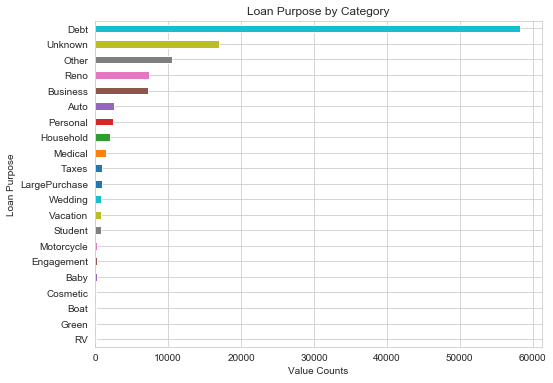

In [228]:
# using Horizontal bar
listing_category.plot.barh(figsize= (8,6))
plt.xlabel('Value Counts', fontsize=10)
plt.ylabel('Loan Purpose', fontsize=10)
plt.title('Loan Purpose by Category')
plt.show()

As illustrated in the graph, "For paying debt" purpose accounts for a vast majority of the loan purpose. It may be a regular sense of some financial companies but It is not a good news from the Macroeconomics point of view. Having a new debt to pay for another debt may indicate that the consumer's financial strength is rely mostly on financial leverage instead of their true asset.

### Credit Score by Prosper Score
Credit Score has a big impact on the acceptance rate and borrowing rate of the loan. Prosper Loan Company, on the other hand, has developed their own score to rate their clients. We will see how comparative these two index are when they are placed next to each other.

C:\Users\Quanghuy289\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(400, 1000)

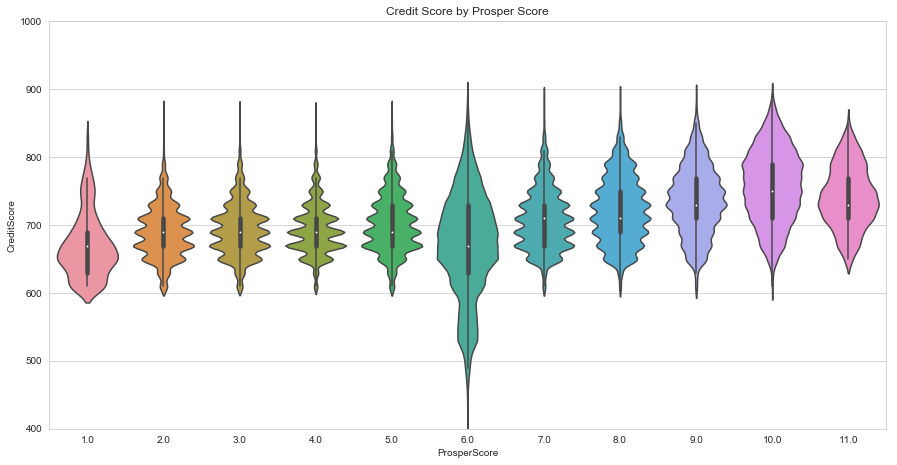

In [229]:
ax = sns.violinplot(x= 'ProsperScore', y ='CreditScore', data = df, scale ='width' )
ax.set_title("Credit Score by Prosper Score")
plt.ylim(400,1000)

Prosper Score seems to be evenly distributed among a scale of 10. CreditScore have a very litte impact to the clients's Prosper Score. I would think that they are using some other indexes for creating clients' Prosper Score.

### Employment Status of the Borrower
Employement status is another category that show the financial status of debtor. The higher chance they are employed and having a full-time job, the higher chance they have their income to pay for their loan installment.

In [230]:
df['EmploymentStatus'].value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Unknown           2255
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [231]:
#We replace 'Not available' to 'Unknown' as they are the same category
df['EmploymentStatus'].replace({'Not available' : 'Unknown'}, inplace = True)
df['EmploymentStatus'].value_counts()

Employed         67322
Full-time        26355
Unknown           7602
Self-employed     6134
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

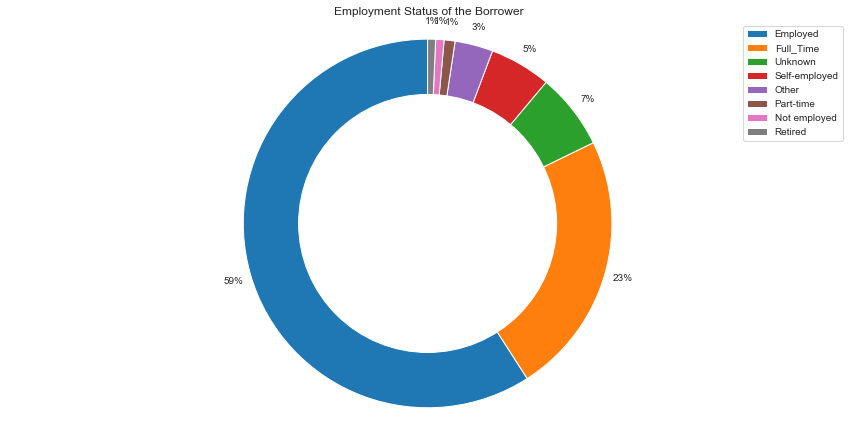

In [232]:
labels = ['Employed','Full_Time', 'Unknown', 'Self-employed', 'Other', 'Part-time', 'Not employed', 'Retired']
plt.pie(df['EmploymentStatus'].value_counts(),autopct='%1.0f%%', startangle=90, pctdistance=1.1, labeldistance=1.3)
#creating a donut pie
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

#Adding title and legend
plt.title('Employment Status of the Borrower')
plt.legend(labels=labels)

# Equal aspect ratio ensures that pie is drawn as a circle
#plt.tight_layout()
plt.axis('equal')
plt.show()

Employed clients account for 64% of the borrower, followed by Full-time and Self-employed with the high of 23% and 5% respectively. However, there are a total of around 13% fall in to Unknown, Not Employed and Other... category. That client should be followed to make a plan with a good source of income for them to be able to pay for the loan.

## Conclusion

Prosper Loan Company does a good job in collecting their loan data of clients. However, It takes some steps in cleaning and simplifying the dataset before it ready to be used.
It is a good practice for me to use my skills to analize and visualize these data. And from there, I think the company can have a good understanding of their clients as well as they can create a plan to better their products/services.